In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import math

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

data = df[['Passengers']].values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [3]:
def create_dataset(dataset, time_step=10):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step, 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_scaled, time_step)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=90, batch_size=16, verbose=1)

Epoch 1/90


c:\Users\NEEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0696 - val_loss: 0.0990
Epoch 2/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0131 - val_loss: 0.0244
Epoch 3/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0116 - val_loss: 0.0247
Epoch 4/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - val_loss: 0.0329
Epoch 5/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0075 - val_loss: 0.0347
Epoch 6/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104 - val_loss: 0.0256
Epoch 7/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074 - val_loss: 0.0249
Epoch 8/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - val_loss: 0.0249
Epoch 9/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082 - val_loss: 0.0254
Epoch 10/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 - val_loss: 0.0250
Epoch 11/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0074 - val_loss: 0.0252
Epoch 12/90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073 - val_loss: 0.0252
Epoch 13/90
7/7 ━━━━━━

In [5]:
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

train_rmse = math.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test_inv, test_predict))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Train RMSE: 31.926301967566157
Test RMSE: 53.043775222392966


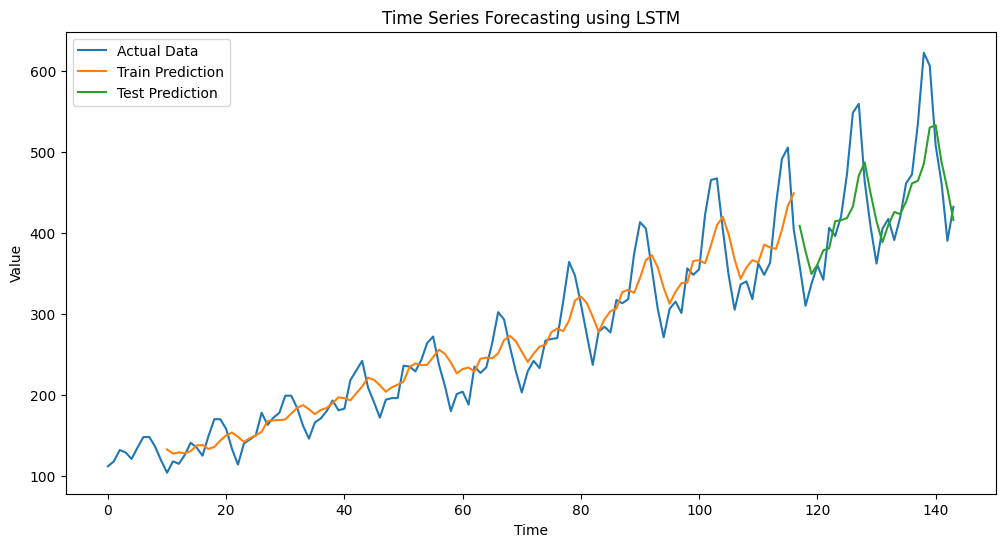

In [6]:
plt.figure(figsize=(12,6))
plt.plot(data, label="Actual Data")

train_plot = np.empty_like(data)
train_plot[:] = np.nan
train_plot[time_step:time_step + len(train_predict)] = train_predict

test_plot = np.empty_like(data)
test_plot[:] = np.nan

test_start = time_step + len(train_predict)
test_end = test_start + len(test_predict)

test_plot[test_start:test_end] = test_predict

plt.plot(train_plot, label="Train Prediction")
plt.plot(test_plot, label="Test Prediction")
plt.legend()
plt.title("Time Series Forecasting using LSTM")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()